#### Libraries and Loading Data

In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf

In [3]:
df_tesla = yf.download('TSLA')
df_tesla.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


#### Simple Moving Average (SMA)

<Axes: title={'center': 'Tesla Stock Price'}, xlabel='Date'>

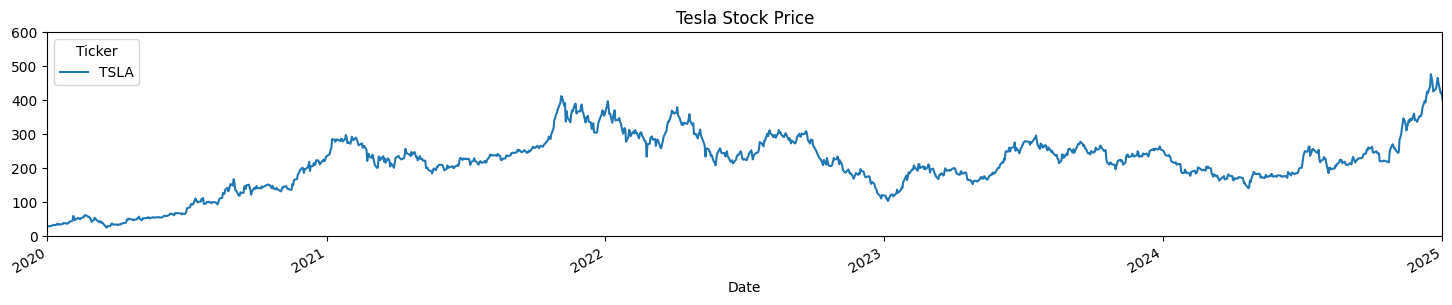

In [13]:
df_tesla['Open'].plot(figsize=(18, 3), xlim=['2020-01-01', '2025-01-01'], ylim=[0, 600], title='Tesla Stock Price')

<Axes: title={'center': 'Tesla Stock Price'}, xlabel='Date'>

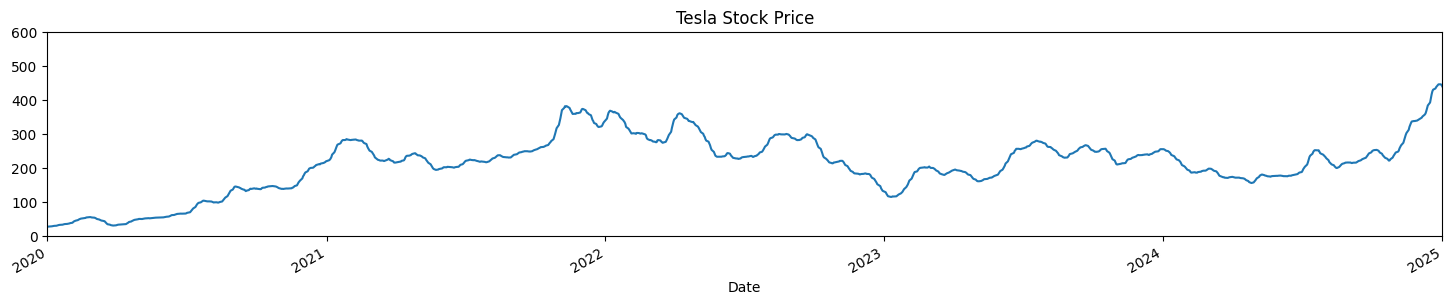

In [22]:
df_tesla['Open - 10 days rolling'] = df_tesla['Open'].rolling(window = 10, min_periods = 1).mean()
df_tesla['Open - 10 days rolling'].plot(figsize=(18, 3), xlim=['2020-01-01', '2025-01-01'], ylim=[0, 600], title='Tesla Stock Price')

<Axes: title={'center': 'Tesla Stock Price'}, xlabel='Date'>

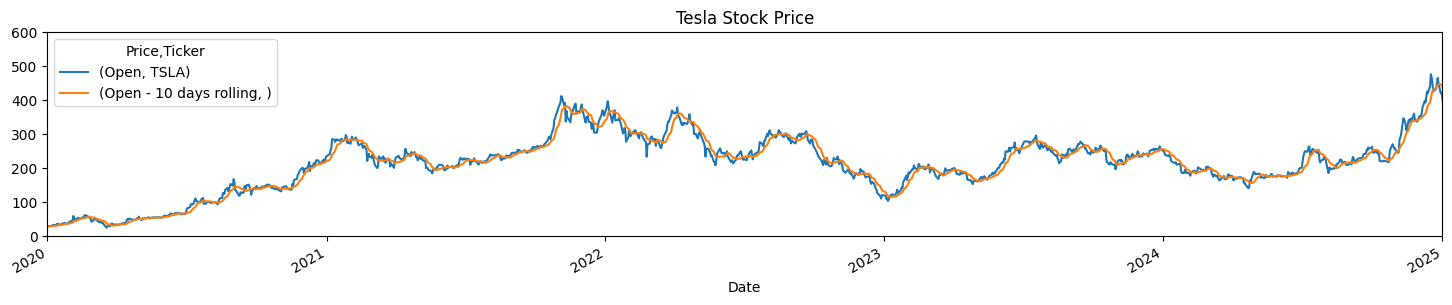

In [23]:
df_tesla[['Open', 'Open - 10 days rolling']].plot(figsize=(18, 3), xlim=['2020-01-01', '2025-01-01'], ylim=[0, 600], title='Tesla Stock Price')

In [33]:
df_tesla['Open - 30 days rolling'] = df_tesla['Open'].rolling(window = 30, min_periods = 1).mean()
df_tesla['Open - 50 days rolling'] = df_tesla['Open'].rolling(window = 50, min_periods = 1).mean()

<Axes: title={'center': 'Tesla Stock Price'}, xlabel='Date'>

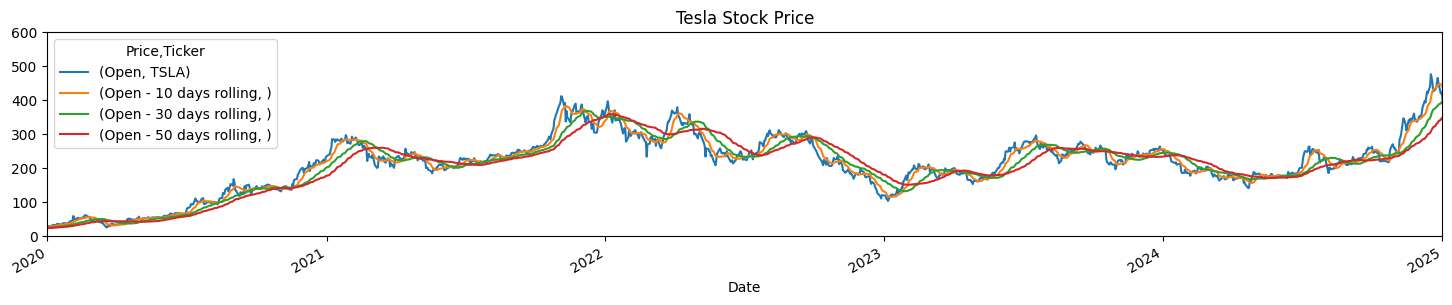

In [34]:
df_tesla[['Open', 'Open - 10 days rolling','Open - 30 days rolling', 'Open - 50 days rolling']].plot(figsize=(18, 3), xlim=['2020-01-01', '2025-01-01'], ylim=[0, 600], title='Tesla Stock Price')

#### Cummulative Moving Average (CMA)

In [41]:
df_tesla['cma'] = df_tesla['Open'].expanding().mean()

<Axes: title={'center': 'Tesla Stock Price'}, xlabel='Date'>

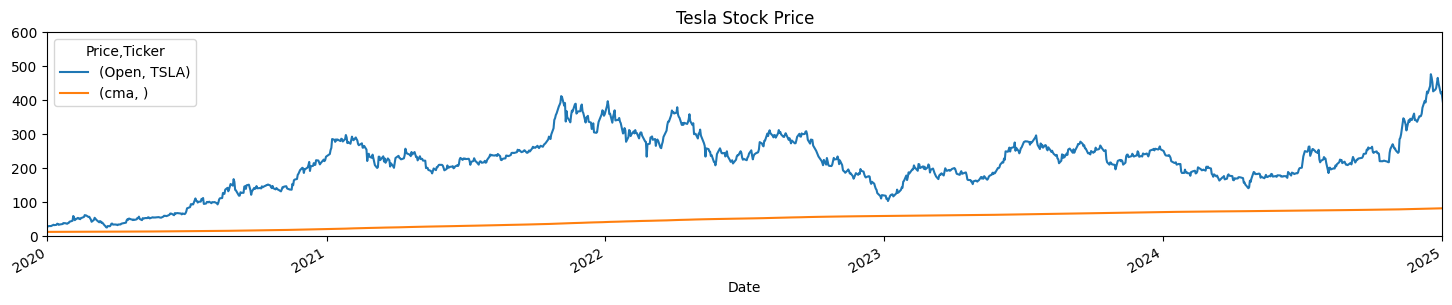

In [43]:
df_tesla[['Open', 'cma']].plot(figsize=(18, 3), xlim=['2020-01-01', '2025-01-01'], ylim=[0, 600], title='Tesla Stock Price')

#### Exponential Moving Average (EMA)

In [45]:
df_tesla['ema_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()
df_tesla['ema_0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

<Axes: title={'center': 'Tesla Stock Price'}, xlabel='Date'>

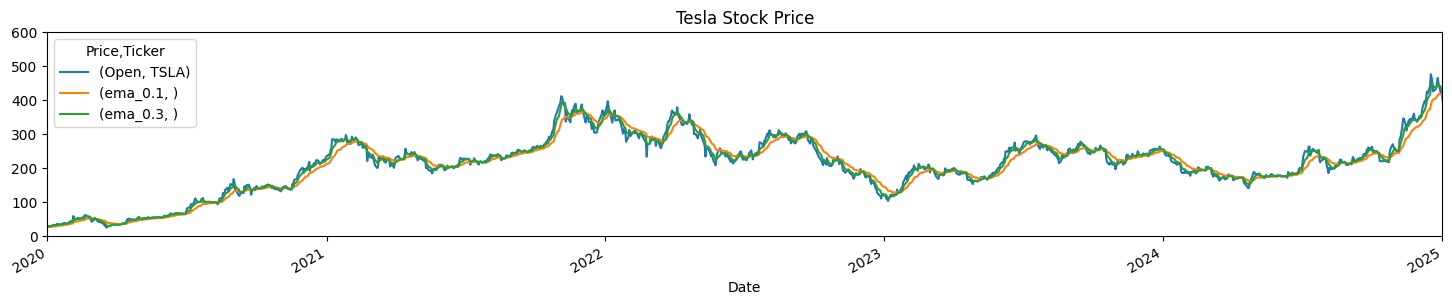

In [53]:
df_tesla[['Open', 'ema_0.1', 'ema_0.3']].plot(figsize=(18, 3), xlim=['2020-01-01', '2025-01-01'], ylim=[0, 600], title='Tesla Stock Price')

#### Exponential Weighted Moving Average (EWMA)

In [55]:
df_tesla['ewma_5'] = df_tesla['Open'].ewm(span=5, adjust=False).mean()

<Axes: title={'center': 'Tesla Stock Price'}, xlabel='Date'>

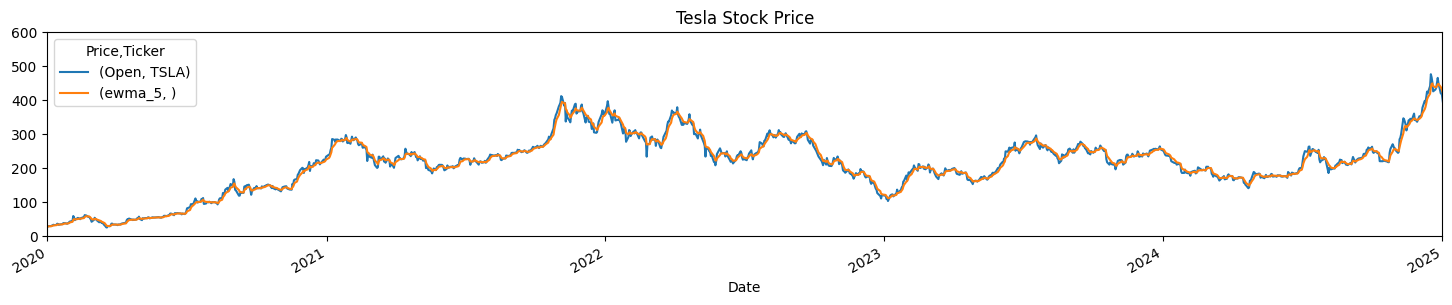

In [57]:
df_tesla[['Open', 'ewma_5']].plot(figsize=(18, 3), xlim=['2020-01-01', '2025-01-01'], ylim=[0, 600], title='Tesla Stock Price')